In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pylab as plt
%matplotlib inline
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [2]:
path = 'data.csv'
data = pd.read_csv(path)

In [73]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = pd.to_datetime(data['Date']).dt.to_period('M')
data['Year'] = pd.to_datetime(data['Date']).dt.to_period('Y')

In [109]:
data

,Date,State,Region,Category,Sub-Category,Sales,Quantity,Month,Year
0,2016-11-08,Kentucky,South,Laptops,Dell,261.96,2.0,2016-11,2016
1,2016-11-08,Kentucky,South,Laptops,HP,731.94,3.0,2016-11,2016
2,2016-06-12,California,West,Mobile Phones,HTC,14.62,2.0,2016-06,2016
3,2019-10-11,Florida,South,Laptops,Lenovo,957.5775,5.0,2019-10,2019
4,2019-10-11,Florida,South,Mobile Phones,OnePlus,22.368,2.0,2019-10,2019
...,...,...,...,...,...,...,...,...,...
9989,2018-01-21,Florida,South,Laptops,Asus,25.248,3.0,2018-01,2018
9990,2017-02-26,California,West,Laptops,Asus,91.96,2.0,2017-02,2017
9991,2017-02-26,California,West,Cameras,Sony,258.576,2.0,2017-02,2017
9992,2017-02-26,California,West,Mobile Phones,Pixel,29.6,4.0,2017-02,2017


In [75]:
data_lt = data.groupby('Category').get_group('Laptops')
data_cmr = data.groupby('Category').get_group('Cameras ')
data_mp = data.groupby('Category').get_group('Mobile Phones')

In [77]:
data_lt_year = data_lt[['Year','Quantity']]
data_cmr_year = data_cmr[['Year','Quantity']]
data_mp_year = data_mp[['Year','Quantity']]

In [79]:
data_lt_year = data_lt_year.groupby(['Year'], as_index = False).sum().sort_values('Year', ascending = True)
data_cmr_year = data_cmr_year.groupby(['Year'], as_index = False).sum().sort_values('Year', ascending = True)
data_mp_year = data_mp_year.groupby(['Year'], as_index = False).sum().sort_values('Year', ascending = True)

In [89]:
cate = ["Laptops", "Cameras", "Moblie Phones"]
quan = []
for i in range(4):
    tmp = []
    tmp.append(data_lt_year["Quantity"][i])
    tmp.append(data_cmr_year["Quantity"][i])
    tmp.append(data_mp_year["Quantity"][i])
    quan.append(tmp)

In [93]:
quan

[[2193.0, 2386.7039999999997, 5946.0],
 [2437.0, 3052.704, 7676.0],
 [1623.0, 1905.528, 4569.0],
 [1775.0, 1489.0, 4715.0]]

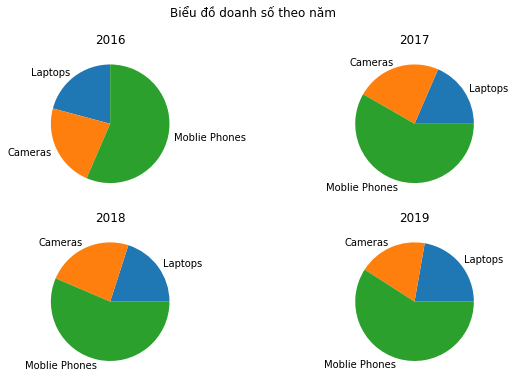

In [108]:
fig, axs = plt.subplots(2,2)
fig.suptitle('Biểu đồ doanh số theo năm')
axs[0,0].pie(quan[0], labels = cate, startangle=90)
axs[0,0].set_title("2016")
axs[0,1].pie(quan[1], labels = cate)
axs[0,1].set_title("2017")
axs[1,0].pie(quan[2], labels = cate)
axs[1,0].set_title("2018")
axs[1,1].pie(quan[3], labels = cate)
axs[1,1].set_title("2019")
plt.show()

In [6]:
data_sub = data.groupby('Sub-Category')

In [7]:
data_sub = data_sub.sum()

<AxesSubplot:title={'center':'Sub-Category'}, xlabel='Sub-Category'>

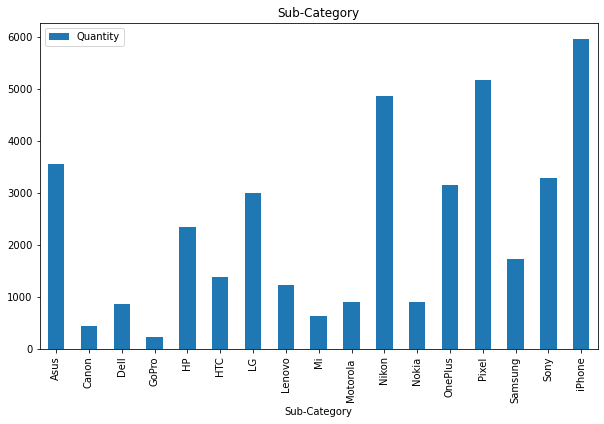

In [8]:
data_sub.plot(kind='bar', title='Sub-Category')

In [70]:
data_lt_month = data_lt[['Month','Quantity']]
data_cmr_month = data_cmr[['Month','Quantity']]
data_mp_month = data_mp[['Month','Quantity']]

In [69]:
data_lt_month = data_lt_month.groupby(['Month'], as_index = False).sum().sort_values('Month', ascending = True)
data_cmr_month = data_cmr_month.groupby(['Month'], as_index = False).sum().sort_values('Month', ascending = True)
data_mp_month = data_mp_month.groupby(['Month'], as_index = False).sum().sort_values('Month', ascending = True)

In [21]:
lt_quan = np.array(data_lt_month)
cmr_quan = np.array(data_cmr_month)
mp_quan = np.array(data_mp_month)

In [22]:
for i in range(48):
    lt_quan[i,0] = i+1
    cmr_quan[i,0] = i+1
    mp_quan[i,0] = i+1

In [23]:
lt_quan[:,1]

array([101.0, 69.0, 162.0, 146.0, 181.0, 128.0, 159.0, 115.0, 284.0,
       187.0, 318.0, 343.0, 86.0, 71.0, 123.0, 175.0, 184.0, 176.0, 183.0,
       127.0, 302.0, 252.0, 364.0, 394.0, 70.0, 23.0, 131.0, 81.0, 97.0,
       122.0, 114.0, 107.0, 208.0, 130.0, 228.0, 312.0, 88.0, 45.0, 111.0,
       107.0, 126.0, 112.0, 162.0, 112.0, 205.0, 140.0, 310.0, 257.0],
      dtype=object)

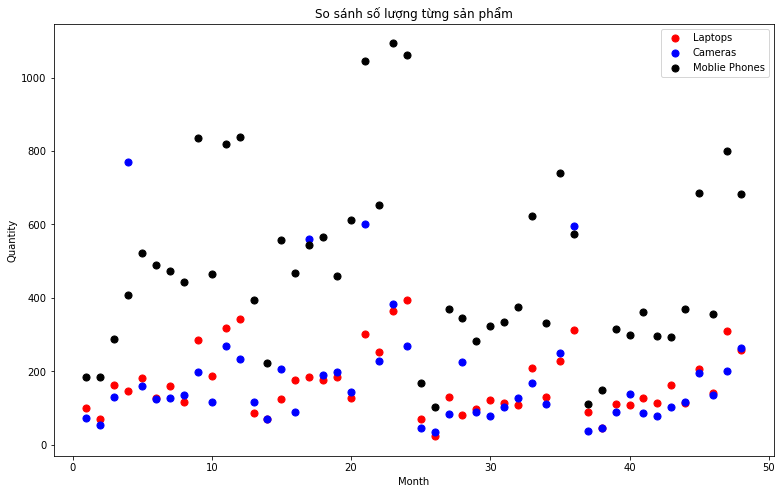

In [24]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(lt_quan[:,0], lt_quan[:,1], color='r',s=50, label="Laptops")
ax.scatter(cmr_quan[:,0], cmr_quan[:,1], color='b', s=50, label='Cameras')
ax.scatter(mp_quan[:,0], mp_quan[:,1], color='black', s=50, label='Moblie Phones')

ax.set_xlabel('Month')
ax.set_ylabel('Quantity')
ax.set_title('So sánh số lượng từng sản phẩm')
ax.legend()
plt.show()

<AxesSubplot:xlabel='Month'>

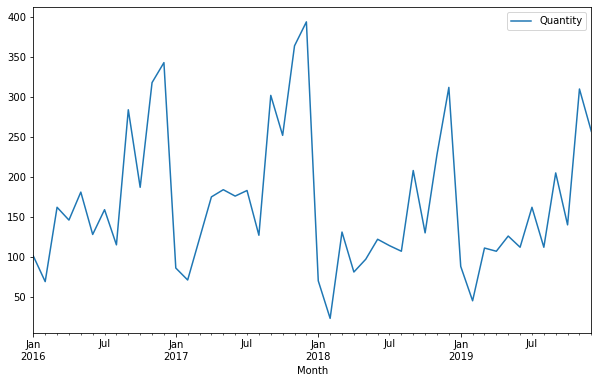

In [11]:
data_lt_month.plot(x='Month', y='Quantity')

<AxesSubplot:xlabel='Month'>

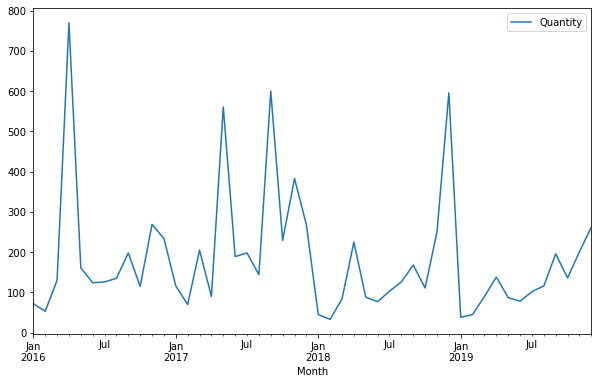

In [12]:
data_cmr_month.plot(x='Month', y='Quantity')

<AxesSubplot:xlabel='Month'>

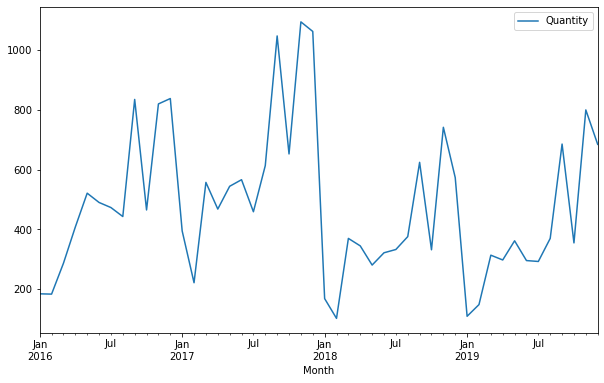

In [13]:
data_mp_month.plot(x='Month', y='Quantity')

In [14]:
def _measure_metric(y, y_hat):
    e = y-y_hat
    mse = np.mean(e**2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(e))
    mape = np.mean(abs(e/y))
    
    print('Mean Square Error: {}'.format(mse))
    print('Root Mean Square Error: {}'.format(rmse))
    print('Mean Absolute Error: {}'.format(mae))
    print('Mean Square Percentage Error: {}'.format(mape))
    return mse, rmse, mae, mape

# Dự đoán với Laptop

In [15]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(data_lt_month['Quantity'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -4.502553
p-value                         0.000195
#Lags Used                      0.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [16]:
#Chia train test

In [17]:
# train_start, train_end = '2016-01', '2019-05'
# test_start, test_end = '2019-06', '2019-12'
# train_month = data_month[train_start:train_end]["Sales"].dropna()
# test_month = data_month['Sales'][test_start:test_end].dropna()
train_lt_month = data_lt_month['Quantity'][:-7]
test_lt_month = data_lt_month['Quantity'][-7:]

In [18]:
test_lt_month

41    112.0
42    162.0
43    112.0
44    205.0
45    140.0
46    310.0
47    257.0
Name: Quantity, dtype: float64

In [19]:
# Model

In [20]:
model_lt_sarima_month = auto_arima(train_lt_month, start_p=0, start_q=0,
                               max_p=7, max_q=7, m=12,
                               start_P=0, seasonal = True,
                               d=0, D=0, trace=True,
                               error_action='ignore',
                               suppress_warmings=True,
                               stepwise=True)
print(model_lt_sarima_month.aic())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=2.67 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=489.293, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=445.181, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=547.382, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=484.956, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=459.175, Time=0.07 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=447.051, Time=0.16 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=451.481, Time=0.21 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=449.325, Time=0.11 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.17

In [21]:
model_lt_sarima_month.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   41
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -218.591
Date:                            Fri, 11 Jun 2021   AIC                            445.181
Time:                                    01:48:51   BIC                            452.036
Sample:                                         0   HQIC                           447.677
                                             - 41                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.6368      7.872      1.097      0.273      -6.793      24.066
ar.L1          0.5856      0.142      4.115      0.000       0.307       0.865
ar.S.L12       0.8728      0.059     14.814      0.000       0.757       0.988
sigma2      1627.4867    464.128      3.507      0.000     717.813    2537.161
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.46
Prob(Q):                              1.00   Prob(JB):                         0.80
Heteroskedasticity (H):               1.07   Skew:                            -0.06
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

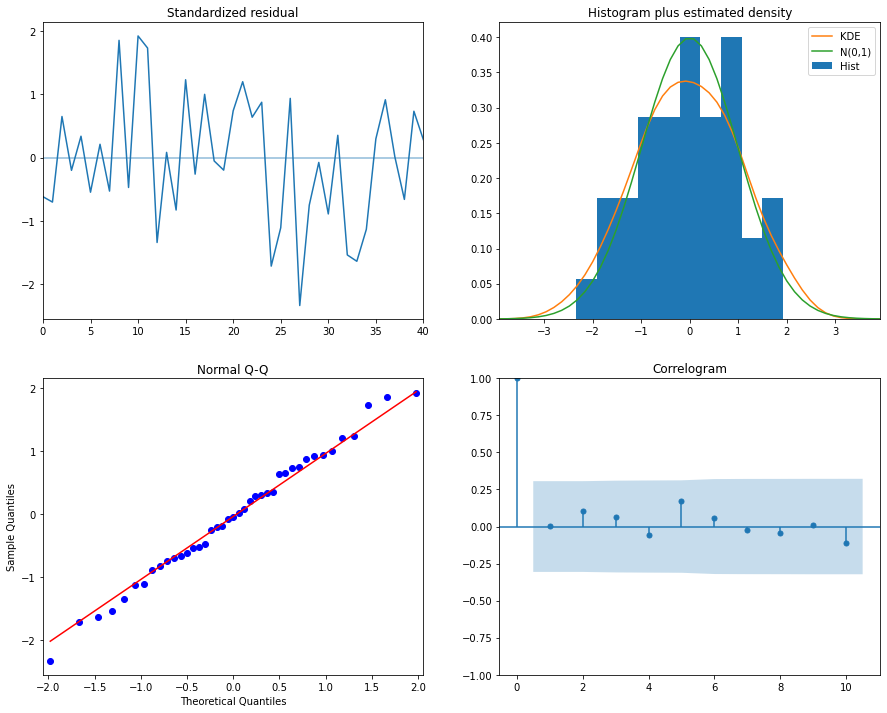

In [22]:
model_lt_sarima_month.plot_diagnostics(figsize=(15,12))
plt.show()

C:\Users\Chocolate23\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


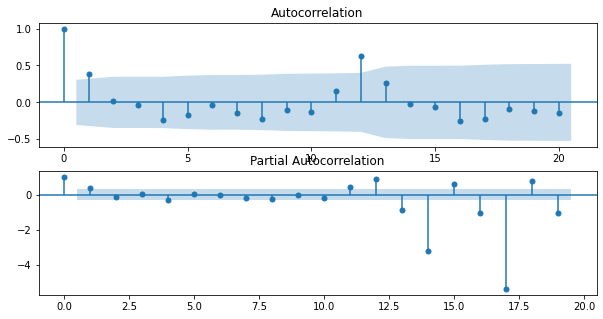

In [23]:
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(train_lt_month, lags=20, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(train_lt_month, lags=19, ax=ax[1])
plt.show()

In [24]:
n_pred = 19
lt_fitted_month, lt_confint_month = model_lt_sarima_month.predict(n_periods=n_pred, return_conf_int=True)

In [25]:
# date = pd.date_range(train_month.index[-1], periods=n_pred, freq='MS')

In [26]:
date = pd.date_range(start='06/01/2019',end='31/12/2020', freq='MS')

In [27]:
date

DatetimeIndex(['2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [35]:
date_predict = pd.date_range(start='01/01/2020',end='31/12/2020', freq='MS')
date_train = pd.date_range(start='01/01/2016', end='31/12/2019', freq='MS')

In [29]:
date_predict

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [30]:
date_lt_train = pd.date_range(start='01/01/2016', end='31/12/2019', freq='MS')

In [31]:
data_lt_month2 = data_lt_month.loc[:,'Quantity']
data_lt_month2 = data_lt_month2.values

In [32]:
data_lt_month2

array([101.,  69., 162., 146., 181., 128., 159., 115., 284., 187., 318.,
       343.,  86.,  71., 123., 175., 184., 176., 183., 127., 302., 252.,
       364., 394.,  70.,  23., 131.,  81.,  97., 122., 114., 107., 208.,
       130., 228., 312.,  88.,  45., 111., 107., 126., 112., 162., 112.,
       205., 140., 310., 257.])

In [36]:
lt_fitted_seri_month = pd.Series(lt_fitted_month, index=date)
data_lt_month3 = pd.Series(data_lt_month2, index=date_train)

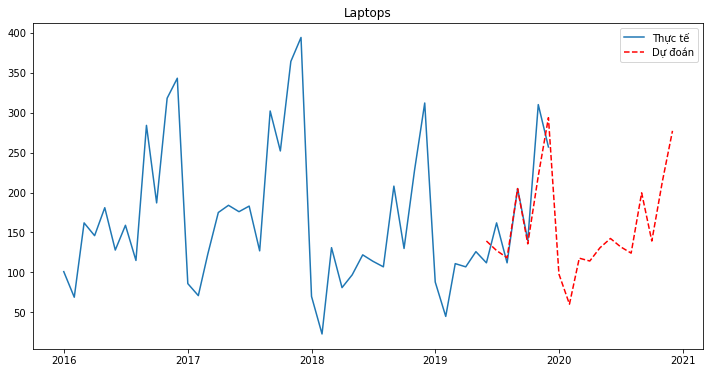

In [110]:
lower_lt = lt_confint_month[:, 0]
upper_lt = lt_confint_month[:, 1]

plt.figure(figsize = (12,6))
plt.plot(data_lt_month3, label = 'Thực tế')
plt.plot(lt_fitted_seri_month, color='red', linestyle='--', label = 'Dự đoán')
# plt.fill_between(date, lower_lt, upper_lt, color = 'grey', alpha=0.2)
plt.legend()
plt.title('Laptops')
plt.show()

<AxesSubplot:>

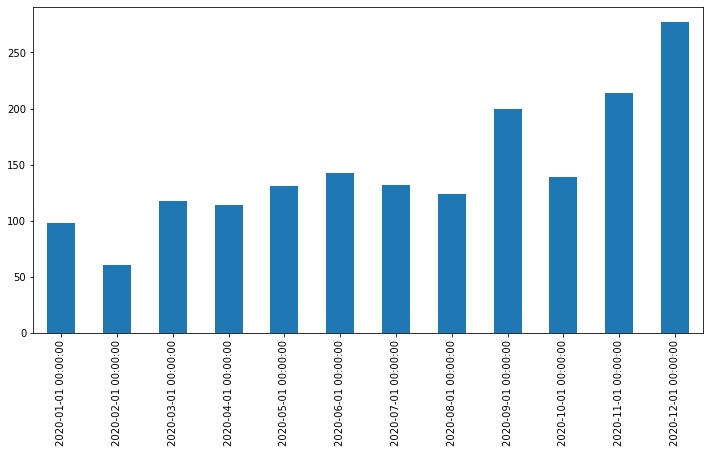

In [64]:
lt_fitted_seri_month[7:].plot(kind='bar', figsize=(12,6))

In [38]:
mse_lt, rmse_lt, mae_lt, mape_lt = _measure_metric(test_lt_month.values[1], lt_fitted_month)

Mean Square Error: 3532.312453594071
Root Mean Square Error: 59.43326049943811
Mean Absolute Error: 50.706178306441835
Mean Square Percentage Error: 0.31300110065704834


### Dự đoán với Cameras

In [39]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(data_cmr_month['Quantity'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -6.466722e+00
p-value                        1.399327e-08
#Lags Used                     0.000000e+00
Number of Observations Used    4.700000e+01
Critical Value (1%)           -3.577848e+00
Critical Value (5%)           -2.925338e+00
Critical Value (10%)          -2.600774e+00
dtype: float64


In [40]:
# train_start, train_end = '2016-01', '2019-05'
# test_start, test_end = '2019-06', '2019-12'
# train_month = data_month[train_start:train_end]["Sales"].dropna()
# test_month = data_month['Sales'][test_start:test_end].dropna()
train_cmr_month = data_cmr_month['Quantity'][:-7]
test_cmr_month = data_cmr_month['Quantity'][-7:]

In [41]:
model_cmr_sarima_month = auto_arima(train_cmr_month, start_p=0, start_q=0,
                               max_p=7, max_q=7, m=12,
                               start_P=0,start_Q=0, seasonal = True,
                               d=0, D=1, trace=True,
                               error_action='ignore',
                               suppress_warmings=True,
                               stepwise=True)
print(model_cmr_sarima_month.aic())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=399.772, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=394.741, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=397.989, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=401.126, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=396.307, Time=0.43 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=396.280, Time=0.31 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=393.009, Time=0.08 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=394.368, Time=0.26 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=394.334, Time=0.25 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=394.792, T

In [42]:
model_cmr_sarima_month.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   41
Model:             SARIMAX(1, 1, 0, 12)   Log Likelihood                -194.112
Date:                  Fri, 11 Jun 2021   AIC                            392.223
Time:                          01:54:31   BIC                            394.958
Sample:                               0   HQIC                           393.080
                                   - 41                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6006      0.100     -6.004      0.000      -0.797      -0.405
sigma2      3.218e+04   7443.617      4.323      0.000    1.76e+04    4.68e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 2.85
Prob(Q):                              0.73   Prob(JB):                         0.24
Heteroskedasticity (H):               0.49   Skew:                            -0.28
Prob(H) (two-sided):                  0.27   Kurtosis:                         4.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

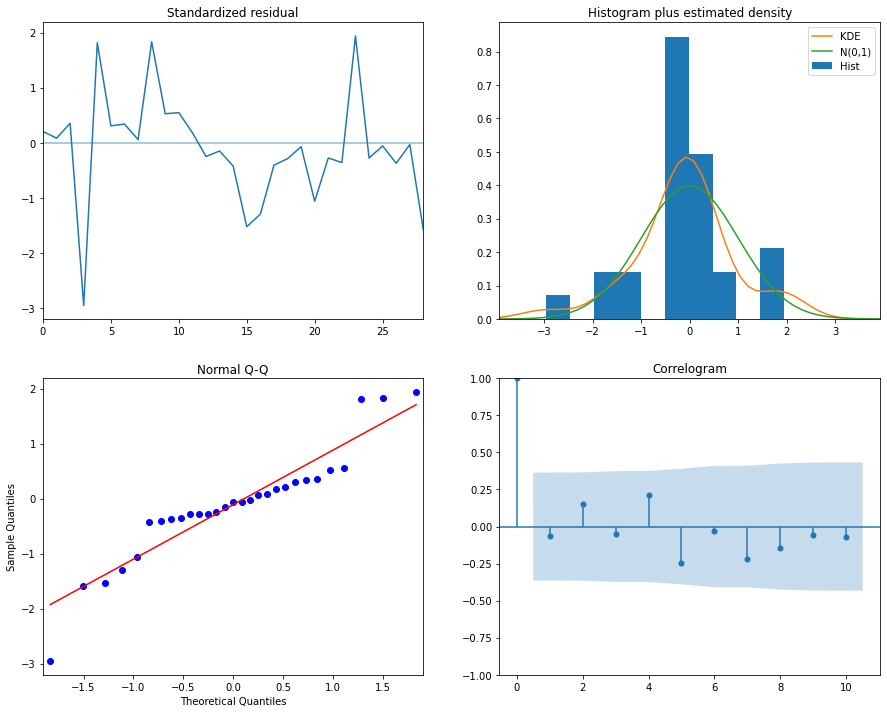

In [43]:
model_cmr_sarima_month.plot_diagnostics(figsize=(15,12))
plt.show()

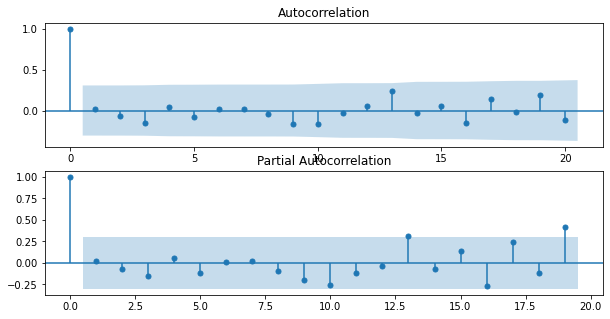

In [44]:
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(train_cmr_month, lags=20, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(train_cmr_month, lags=19, ax=ax[1])
plt.show()

In [45]:
n_pred = 19
cmr_fitted_month, cmr_confint_month = model_cmr_sarima_month.predict(n_periods=n_pred, return_conf_int=True)

In [46]:
data_cmr_month2 = data_cmr_month.loc[:,'Quantity']
data_cmr_month2 = data_cmr_month2.values

In [47]:
cmr_fitted_month

array([144.27138023, 160.06054573, 136.81147182, 427.45129824,
       181.87520417, 329.88476402, 398.88872106,  42.20446126,
        37.79235212,  86.39617606, 190.12570948,  87.60063732,
       103.86567846, 125.78785227, 130.31769832, 271.6151649 ,
       139.30491124, 281.90299317, 517.12734891])

In [48]:
cmr_fitted_seri_month = pd.Series(cmr_fitted_month, index=date)
data_cmr_month3 = pd.Series(data_cmr_month2, index=date_train)

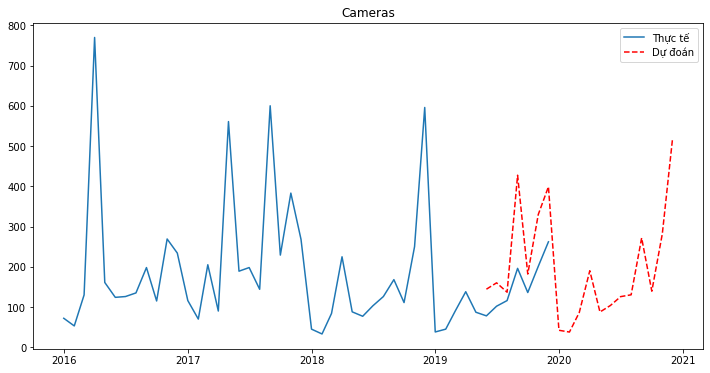

In [111]:
lower_cmr = cmr_confint_month[:, 0]
upper_cmr = cmr_confint_month[:, 1]

plt.figure(figsize = (12,6))
plt.plot(data_cmr_month3, label = 'Thực tế')
plt.plot(cmr_fitted_seri_month, color='red', linestyle='--', label = 'Dự đoán')
# plt.fill_between(date, lower_cmr, upper_cmr, color = 'grey', alpha=0.2)
plt.legend()
plt.title('Cameras')
plt.show()

<AxesSubplot:>

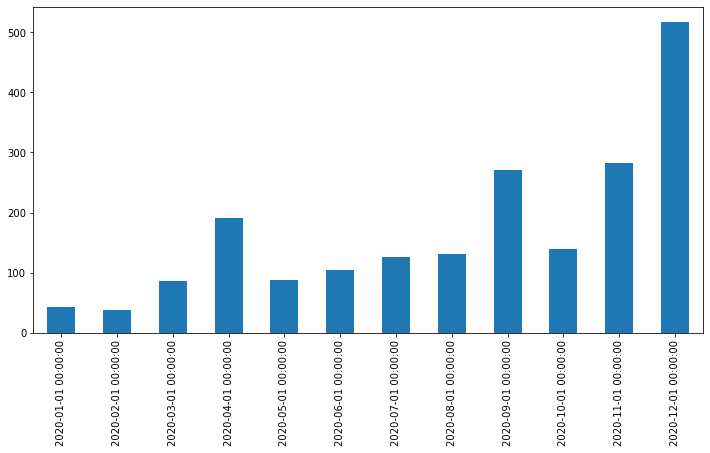

In [65]:
cmr_fitted_seri_month[7:].plot(kind='bar', figsize=(12,6))

In [50]:
mse_cmr, rmse_cmr, mae_cmr, mape_cmr = _measure_metric(test_cmr_month.values[1], cmr_fitted_month)

Mean Square Error: 26888.726180928552
Root Mean Square Error: 163.97782222278886
Mean Absolute Error: 113.85774290779239
Mean Square Percentage Error: 1.1162523814489451


# Dự đoán cho Moblie Phones


In [51]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(data_mp_month['Quantity'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -4.385875
p-value                         0.000314
#Lags Used                      0.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [52]:
# train_start, train_end = '2016-01', '2019-05'
# test_start, test_end = '2019-06', '2019-12'
# train_month = data_month[train_start:train_end]["Sales"].dropna()
# test_month = data_month['Sales'][test_start:test_end].dropna()
train_mp_month = data_mp_month['Quantity'][:-7]
test_mp_month = data_mp_month['Quantity'][-7:]

In [53]:
model_mp_sarima_month = auto_arima(train_mp_month, start_p=0, start_q=0,
                               max_p=7, max_q=7, m=12,
                               start_P=0, seasonal = True,
                               d=0, D=0, trace=True,
                               error_action='ignore',
                               suppress_warmings=True,
                               stepwise=True)
print(model_mp_sarima_month.aic())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=573.168, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=540.166, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=633.614, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=566.825, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=557.581, Time=0.07 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=541.665, Time=0.18 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=541.429, Time=0.17 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=545.637, Time=0.10 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.19

In [54]:
model_mp_sarima_month.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   41
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -266.083
Date:                            Fri, 11 Jun 2021   AIC                            540.166
Time:                                    01:54:35   BIC                            547.021
Sample:                                         0   HQIC                           542.662
                                             - 41                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     36.9674     32.868      1.125      0.261     -27.453     101.388
ar.L1          0.6396      0.134      4.785      0.000       0.378       0.902
ar.S.L12       0.7660      0.112      6.823      0.000       0.546       0.986
sigma2      1.935e+04   5453.118      3.548      0.000    8657.129       3e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.62
Prob(Q):                              0.88   Prob(JB):                         0.27
Heteroskedasticity (H):               0.61   Skew:                            -0.23
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

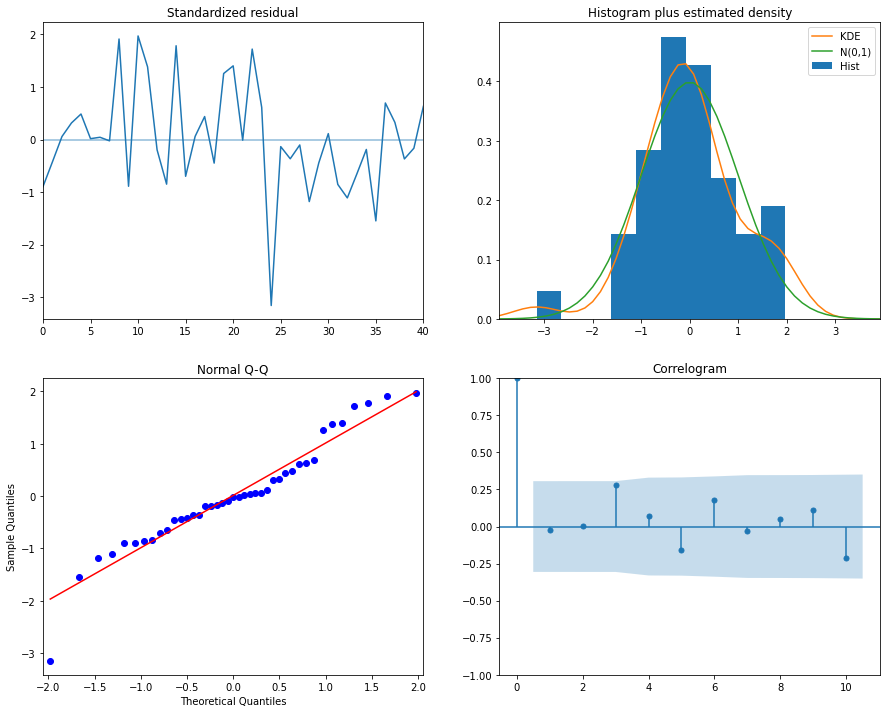

In [55]:
model_mp_sarima_month.plot_diagnostics(figsize=(15,12))
plt.show()

C:\Users\Chocolate23\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


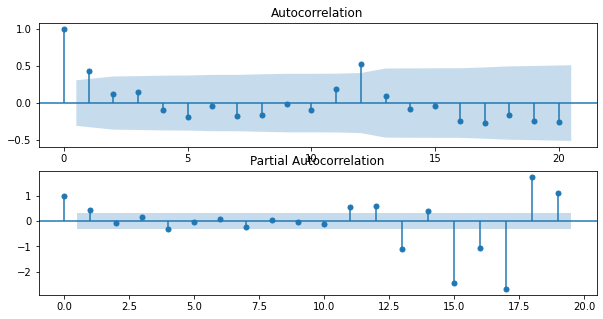

In [56]:
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(train_mp_month, lags=20, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(train_mp_month, lags=19, ax=ax[1])
plt.show()

In [57]:
mp_fitted_month, mp_confint_month = model_mp_sarima_month.predict(n_periods=n_pred, return_conf_int=True)

In [58]:
data_mp_month2 = data_mp_month.loc[:,'Quantity']
data_mp_month2 = data_mp_month2.values

In [59]:
data_mp_month2

array([ 185.,  184.,  287.,  408.,  521.,  490.,  473.,  443.,  834.,
        465.,  819.,  837.,  395.,  222.,  557.,  468.,  544.,  566.,
        459.,  613., 1046.,  652., 1093., 1061.,  169.,  103.,  370.,
        345.,  281.,  322.,  333.,  376.,  624.,  332.,  741.,  573.,
        110.,  149.,  314.,  298.,  362.,  296.,  293.,  370.,  685.,
        355.,  799.,  684.])

In [60]:
mp_fitted_seri_month = pd.Series(mp_fitted_month, index=date)
data_mp_month3 = pd.Series(data_mp_month2, index=date_train)

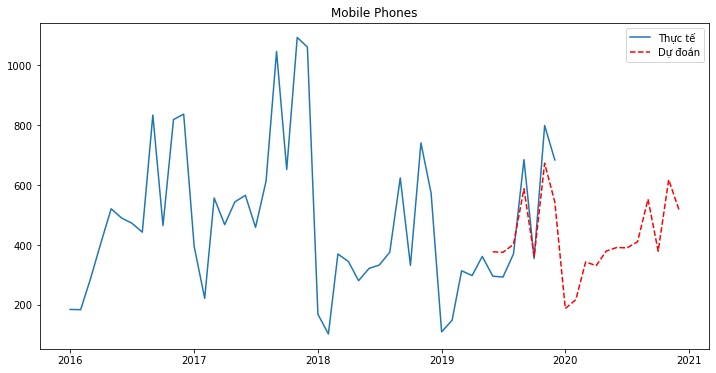

In [112]:
lower_mp = mp_confint_month[:, 0]
upper_mp = mp_confint_month[:, 1]

plt.figure(figsize = (12,6))
plt.plot(data_mp_month3, label = 'Thực tế')
plt.plot(mp_fitted_seri_month, color='red', linestyle='--', label = 'Dự đoán')
# plt.fill_between(date, lower_mp, upper_mp, color = 'grey', alpha=0.2)
plt.legend()
plt.title('Mobile Phones')
plt.show()

<AxesSubplot:>

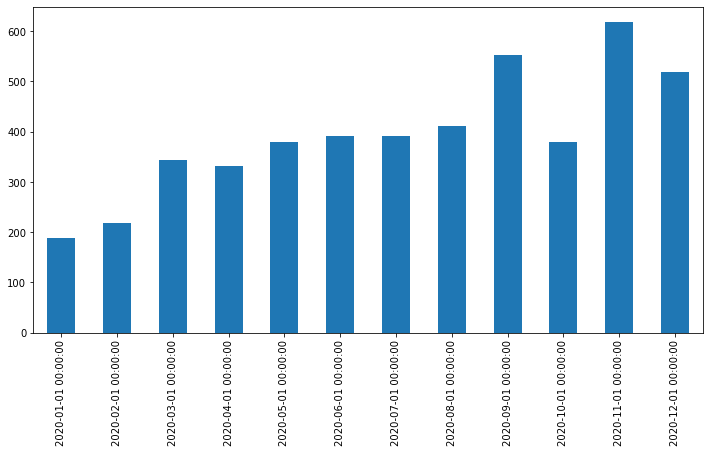

In [66]:
mp_fitted_seri_month[7:].plot(kind='bar', figsize=(12,6))

In [62]:
mse_mp, rmse_mp, mae_mp, mape_mp = _measure_metric(test_mp_month.values[1], mp_fitted_month)

Mean Square Error: 32524.442940297537
Root Mean Square Error: 180.34534355036044
Mean Absolute Error: 149.36510160241716
Mean Square Percentage Error: 0.5097785037625159
